 
- Pour s'y retrouver dans tous les fichiers :
    - 0) Fichier brute de départ : "DATA/NEW/positionshistorique.csv"
    - 1) "DATA/dataset_pret_pour_analyse_exploratoire.csv" : données préparées pour exploration (NB : notebook de préparation contenant encore des fichiers intermédiaires)
    - 3) 'DATA/PREPADATA/data_model_q.csv' : données préparées pour ACP en R avec RStudio
    - 4) 'DATA/PREPADATA/df_tableau_ind_var_a_transformer.csv' pour modifications manuelle dans Excel
    - 5) "DATA/PREPADATA/df_tableau_ind_var.csv" : fichier qui donne le tableau Individu x variable


- Pour s'y retrouver dans les notebook :
    - A. Etape 1 - Preparation des données à partir du fichier brut complet.ipynb 
    - B. Etape 2_delai_emission_delai_reception_futurs.ipynb - pour comparer avec le délai passé (idem) le délai futur est choisi au final
    - B. Etape 2_delai_emission_delai_reception_passée.ipynb 
    - C. Etape 3 - Preparation des données à partir du fichier Etude.ipynb (fin etape 2)
    - D. Analyse exploratoire -divers transfo data_visualisation.ipynb
    - ACP, Arbre, RandomForest effectués dans RStudio (en R) 


In [2]:
import  calendar as cal, datetime as dt, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import  matplotlib.colors
from scipy import stats, integrate

In [3]:
import statistics

In [116]:
#recodage de la variable pour déterminer une couleur
def group_colors (x) :
    val = 'white' 
    if x==10 :
        val = 'blue' 
    elif x==11 :
        val = 'green'
    elif x==12 :
        val = 'red'
    else :
        val = 'black'
    return val

In [4]:
#sns.set(color_codes=True)

In [5]:
%matplotlib inline

In [6]:
np.random.seed(1)

# Analyse exploratoire

In [9]:
data = pd.read_csv("../DATA/dataset_pret_pour_analyse_exploratoire.csv",sep =';', header = 0 , parse_dates=[0,1,9,10])

In [10]:
#variables calculées pour analyse exploratoire - étude abandonnée sur l'axe temporel
data.drop(['momentGPS', 'dateHeureRec','dateHeureGPS','distanceSuiv','dateHeureServeurSuiv','dateHeureBaliseSuiv'],inplace=True, axis=1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165969 entries, 0 to 165968
Data columns (total 23 columns):
idBalise             165969 non-null int64
vitesse              165969 non-null int64
direction            165969 non-null int64
altitude             165969 non-null int64
satellites           165969 non-null int64
messageId            165969 non-null int64
distance             165969 non-null int64
delaiServeur         165969 non-null int64
delaiBalise          165969 non-null int64
deltaDistance        165969 non-null int64
lng                  165969 non-null float64
lat                  165969 non-null float64
power                165969 non-null float64
volt                 165969 non-null float64
labelBalise          165969 non-null object
labelMessage         165969 non-null object
delaiTransmission    165969 non-null int64
jourBalise           165969 non-null int64
jourServeur          165969 non-null int64
rangDateGPS          165969 non-null int64
rangDateRec        

In [12]:
data.kurtosis()

idBalise               -1.591020
vitesse                -0.568975
direction              -1.222819
altitude                4.162717
satellites              4.130710
messageId               8.024888
distance               -1.110074
delaiServeur         1926.655789
delaiBalise          1824.335484
deltaDistance          69.155969
lng                    -1.343998
lat                    -1.400152
power                   2.087062
volt                   -0.852046
delaiTransmission     358.645709
jourBalise             -0.933610
jourServeur            -0.921366
rangDateGPS            -1.148957
rangDateRec            -1.143742
client                 -1.590646
dtype: float64

In [13]:
data.skew()

idBalise             -0.213155
vitesse               0.489751
direction            -0.041564
altitude              1.754073
satellites           -1.567001
messageId             3.066116
distance              0.720349
delaiServeur         39.698773
delaiBalise          38.805758
deltaDistance         4.055307
lng                   0.722026
lat                   0.295314
power                -1.538195
volt                 -0.172006
delaiTransmission    16.803526
jourBalise            0.210706
jourServeur           0.204383
rangDateGPS           0.025219
rangDateRec           0.022909
client               -0.213954
dtype: float64

In [16]:
data_visu = data[['idBalise', 'vitesse', 'direction', 'altitude', 'satellites',
       'messageId', 'distance', 'delaiServeur', 'delaiBalise', 'deltaDistance',
       'lng', 'lat', 'power', 'volt', 
       'delaiTransmission', 'jourBalise', 'jourServeur', 'rangDateGPS',
       'rangDateRec', 'client']]
data_visu.head()

,idBalise,vitesse,direction,altitude,satellites,messageId,distance,delaiServeur,delaiBalise,deltaDistance,lng,lat,power,volt,delaiTransmission,jourBalise,jourServeur,rangDateGPS,rangDateRec,client
0,10002,0,347,32,9,500,24764799,161,162,142,7.14174,43.66708,14.05,3.97,2,2,2,202777,202779,10
1,10002,33,138,32,10,2,24764941,19,20,200,7.14222,43.66632,14.14,3.97,1,2,2,202939,202940,10
2,10002,42,134,27,8,2,24765141,20,20,200,7.14393,43.66502,14.06,3.97,0,2,2,202959,202959,10
3,10002,21,138,26,8,2,24765341,21,20,151,7.14596,43.66403,14.03,3.97,0,2,2,202979,202979,10
4,10002,27,134,30,10,2,24765492,19,20,177,7.14737,43.66313,14.05,3.97,1,2,2,202999,203000,10


# Nettoyage : Suppression des observations du week-end

In [17]:
data=data[data.jourBalise<6]

# calculs des variables supplémentaires

In [18]:
data['lngBin'] = pd.cut(data.lng,10)
data['latBin'] = pd.cut(data.lat,10)
data['latBinlabel'] = pd.cut(data.lat,10,labels=["l01","l02","l03","l04","l05","l06","l07","l08","l09","l10"])
data['lngBinlabel'] = pd.cut(data.lng,10,labels=["L01","L02","L03","L04","L05","L06","L07","L08","L09","L10"])
data['zone']=data.apply ( lambda row : row["lngBinlabel"] +'_'+ row["latBinlabel"], axis = 1 )
data['individu'] = data.apply ( lambda row : row["labelBalise"] +'_'+row["lngBinlabel"] +'_'+ row["latBinlabel"], axis = 1 )

/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

Variables pour étudier la proportion entre les classe et pour définir la règle d'étiquettage

In [19]:
#Tous les délais supérieurs à 34 secondes même si le véhicule est à l'arrêt
# pas d'hypothèse sur l'insatisfaction
data['top_target']=  np.where(data["delaiBalise"]>34, 0, 1)

/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
data['etat'] = data.apply ( lambda row : 'stop' if ((row["deltaDistance"]==0) & (row["vitesse"]==0)  ) else 'roule', axis = 1 )

data['OKKO'] = data.apply ( lambda row : '_OK_' if (row["delaiBalise"]<34) else '_KO_', axis = 1 )
#certaine duree au-delà de 34 secondes sont considérées comme normales 
#puisque le véhicule diminiue la fréquence d'emission à l'arrtêt(hypothèse déduite des données de l'échantillon)
data['OKKO'] = data.apply ( lambda row : '_OK_' if ((row["delaiBalise"]>34) & (row["deltaDistance"]==0) & (row["vitesse"]==0) & (row["labelMessage"]!='M2')) else row['OKKO'], axis = 1)

data['satisfaction'] = data.apply ( lambda row : 1 if (row["OKKO"]=='_OK_') else 0, axis = 1)

/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [21]:
data['niveauPower']= np.where(data["power"]<13, 'lowPower', 'highPower')
data['power'].quantile(0.106) #seuil vu dans les arbres de décision power = 12.99

/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


12.99

In [22]:
data[data['vitesse']<17].etat.value_counts() #seuil vu dans les arbres de décision vitesse = 17
data['niveauVitesse']=  np.where(data["power"]<17, 'lowSpeed', 'speedPlus')
data['vitesse'].quantile(0.195)

/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


17.0

Le messageId est à considérer comme une variable qualitative que l'on peut ramener à un ensemble de classe décrite comme suit : M2, M501, M202, Mx qui regroupe les M161,M179,M193,M194,M201 et M500.

In [1]:
data.loc[(data['messageId']==161) | (data['messageId']==179) |(data['messageId']==193) |(data['messageId']==194) |(data['messageId']==201) |(data['messageId']==202) ,'labelMessage']='Mx'

NameError: name 'data' is not defined

In [2]:
######################
##### TRANSFORMATION DU FICHIER INITIAL EN TABLEAU INDIVIDUS VARIABLES
############"
df_tableau_ind_var=data.groupby(['individu', 'labelMessage', 'niveauPower', 'etat','top_target'])['idBalise'].count()

file=df_tableau_ind_var.unstack(fill_value=0)
file.to_csv('../DATA/PREPADATA/df_tableau_ind_var_a_transformer.csv', sep = ';',index = True)
file#=F2/(E2+F2) puis arrondi à l'entier {0;1} transformation dans excel manuelle / renommage de colonne 0 et 1

file_transformed = pd.read_table("../DATA/PREPADATA/df_tableau_ind_var.csv",sep =';',header = 0)

file_transformed.info()

NameError: name 'data' is not defined

In [24]:
#Proportion entre les classes cibles selon 2 règles d'étiquetage différentes

In [30]:
data['target']=  np.where(data["delaiBalise"]>34, 0, 1)

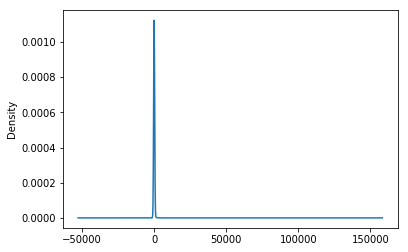

In [27]:
data['delaiBalise'].value_counts().plot(kind='kde')# pas d'hypothèse sur l'insatisfaction

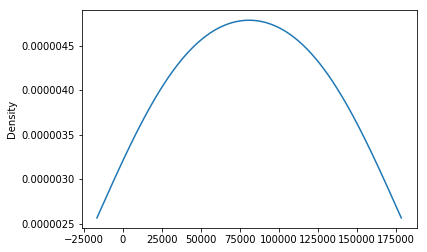

In [31]:
data['target'].value_counts().plot(kind='kde')# pas d'hypothèse sur l'insatisfaction

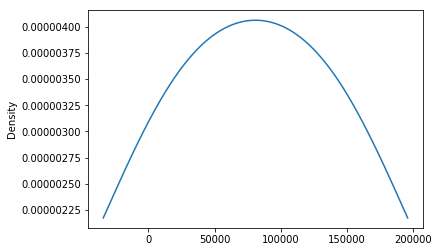

In [32]:
data['satisfaction'].value_counts().plot(kind='kde')
#Tous les délais supérieurs à 34 secondes sauf si le véhicule est à l'arrêt

> ### Valeurs aberrantes :
- analyse détaillée des différents délais

In [9]:
data[data['delaiTransmission']<0].shape

(19, 23)

Un délai de transmission négatif signifie que les horloges du serveur et des balises ne sont pas réglés de la même manière. Le délai ne peut être calculé de manière correcte sur cette base.

In [10]:
data[data['delaiServeur']<0].shape

(81, 23)

Un délai négatif entre deux enregistrements successifs signifie que le serveur n'a pas enregistré/reçu les positions des balises dans l'ordre chronologique d'enregistrement des positions par la balise GPS.

In [11]:
data[data['delaiBalise']<0].shape

(0, 23)

Aucun délai négatif puisque le tri des observations a été établi selon l'ordre d'enregistrement des positons GPS

> ### Analyse univariée

In [35]:
desc=data[['power','volt']].describe()
desc

,power,volt
count,161789.000000,161789.000000
mean,14.145729,4.073147
std,0.628871,0.045684
min,11.360000,3.970000
25%,14.060000,4.050000
50%,14.320000,4.080000
75%,14.430000,4.110000
max,15.260000,4.160000


/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7836e8c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd78352b6d8>]], dtype=object)

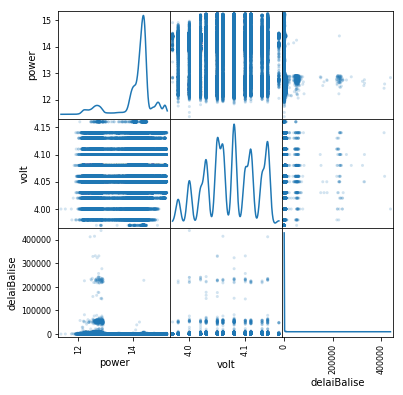

In [36]:
df=data[['power','volt','delaiBalise']]
pd.scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')


Ces variables caractérisent l'état du véhicule avec la puissance et le voltage de la baterie. Ces variables sont des variables continues qui ne varient pas beaucoup. L'information portée par ces variables ne semblent pas pertinente.


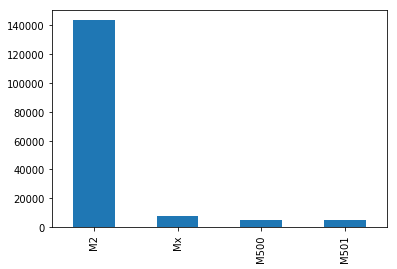

In [38]:
data.labelMessage.value_counts().plot(kind='bar')
plt.savefig('../IMG/satellitesHistogramme.png')

L'idBalise est une valeur numérique discrète qui identifie une balise donc dans les faits c'est une variable qualitative. On détecte 3 groupes de balises.

In [39]:
dognut_matrix1=data.groupby(['labelMessage'])['delaiBalise'].sum()

names1=dognut_matrix1.index
size1 =dognut_matrix1.values


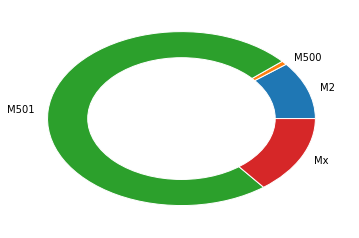

In [40]:
my_circle1=plt.Circle((0,0), 0.7, color='white')
plt.pie(size1,labels=names1, labeldistance=1.1, wedgeprops ={'linewidth':1, 'edgecolor':'white'})
p1=plt.gcf()
plt.gcf()
p1.gca().add_artist(my_circle1)
plt.show()
plt.savefig('../IMG/dognutMessageId1.png')

On constate une répartition inégale des observations par messageId. Le type 2 semble signifie que le véhicule est en cours de déplacement. Les cautres message sont moins représentés et la moitié parmi ceux ci sont des messages de type 500 et 501.

In [41]:
dognut_matrix2=data[data.messageId!=2].groupby('labelMessage')['messageId'].count()

names2=dognut_matrix2.index
size2 =dognut_matrix2.values


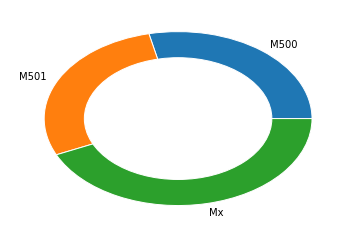

In [43]:
my_circle2=plt.Circle((0,0), 0.7, color='white')
plt.pie(size2,labels=names2, labeldistance=1.1, wedgeprops ={'linewidth':1, 'edgecolor':'white'})
p2=plt.gcf()
plt.gcf()
p2.gca().add_artist(my_circle2)
plt.show()
plt.savefig('../IMG/dognutMessageId2.png')

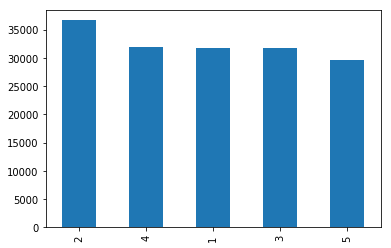

In [44]:
#data.hist(column='jourBalise')
data.jourBalise.value_counts().plot(kind='bar')
plt.savefig('../IMG/jourBalise.png')

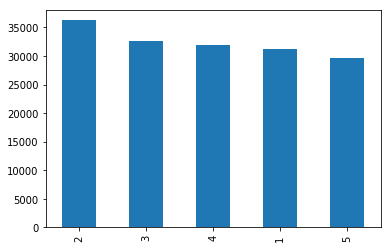

In [45]:
#data.hist(column='jourServeur')
data.jourServeur.value_counts().plot(kind='bar')
plt.savefig('../IMG/jourServeur.png')

jourBalise et jourServeur donne sensiblement la même information. On conservera donc uniquement jourBalise et uniquement les observation des jours ouvrés.

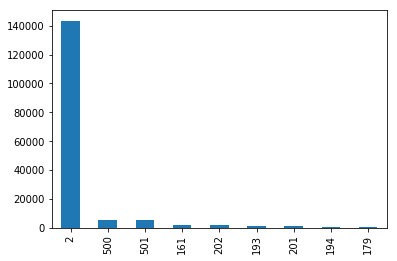

In [46]:
#data.hist(column='jourBalise')
data.messageId.value_counts().plot(kind='bar')
plt.savefig('../IMG/messageId.png')

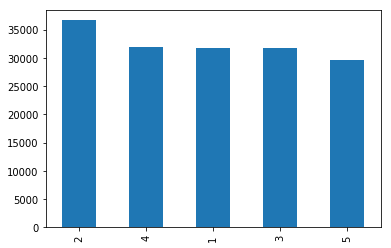

In [47]:
data.jourBalise.value_counts().plot(kind='bar')
plt.savefig('../IMG/jourBalise2.png')

In [48]:
#data[data['zone']=='L03_l03'][['lngBin','latBin']]
data[data['zone']=='L03_l03'].groupby(['lngBin', 'latBin','labelBalise'])['labelBalise'].count()
#data[data['zone']=='L03_l03']['labelBalise'].value_counts().plot(kind='bar')

lngBin          latBin           labelBalise
(5.295, 5.548]  (43.23, 43.305]  B11002         1303
                                 B11003          363
                                 B11004          319
                                 B11005         2954
                                 B12001         2890
                                 B12002         3411
                                 B12003         3102
                                 B12004         5713
                                 B12005         2652
                                 B12006         5393
                                 B12007         2540
                                 B12008         5498
                                 B12009         4924
                                 B12010         4838
Name: labelBalise, dtype: int64

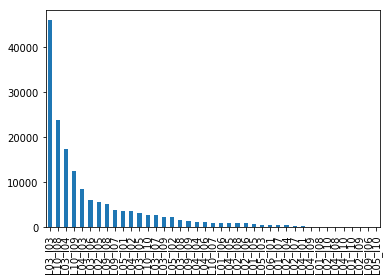

In [49]:
data.zone.value_counts().plot(kind='bar')

In [50]:
desc=data[['lng','lat','altitude','satellites','direction','vitesse']].describe()
desc

,lng,lat,altitude,satellites,direction,vitesse
count,161789.000000,161789.000000,161789.000000,161789.000000,161789.000000,161789.000000
mean,5.976357,43.440904,86.265265,8.056432,184.141073,45.853637
std,0.791364,0.184252,82.481048,2.067119,103.368115,31.752229
min,4.788180,43.079900,-338.000000,0.000000,0.000000,0.000000
25%,5.399390,43.287690,27.000000,7.000000,93.000000,22.000000
50%,5.488970,43.356660,63.000000,8.000000,183.000000,41.000000
75%,7.057930,43.656750,118.000000,9.000000,274.000000,69.000000
max,7.319920,43.831350,665.000000,12.000000,360.000000,154.000000


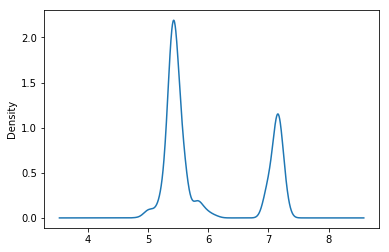

In [52]:
data.lng.plot(kind='kde')
plt.savefig('../IMG/lng2.png')

In [54]:
data.to_csv('../DATA/D_analyse_transformation_avant_acp.csv', sep = ';',index = True)
df_zone = pd.read_table("../DATA/D_analyse_transformation_avant_acp.csv",sep =';',header = 0)

In [55]:
data['zone'].value_counts().quantile(0.8)

3823.0

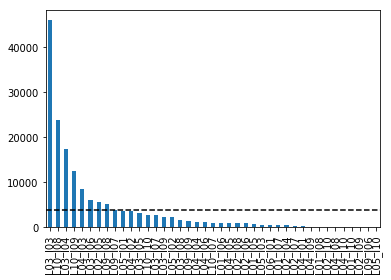

In [56]:
data.zone.value_counts().plot(kind='bar')
plt.axhline(y=3823, color='black', linestyle='--')# line separatrice des 80/20


In [57]:
type(data.lng)

pandas.core.series.Series

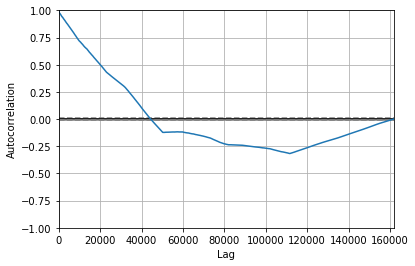

In [58]:
from pandas.plotting import autocorrelation_plot
plt.figure()
#ddata = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))
autocorrelation_plot(data.lng)

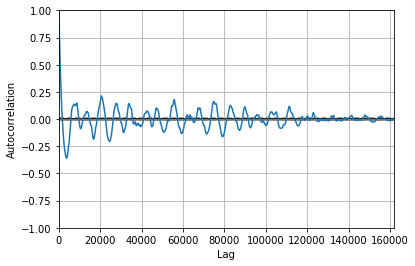

In [59]:
from pandas.plotting import autocorrelation_plot
plt.figure()
#ddata = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))
autocorrelation_plot(data.rangDateGPS)

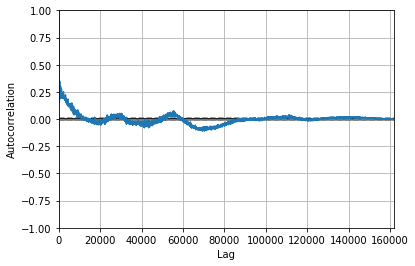

In [60]:
from pandas.plotting import autocorrelation_plot
plt.figure()
#ddata = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))
autocorrelation_plot(data.altitude)

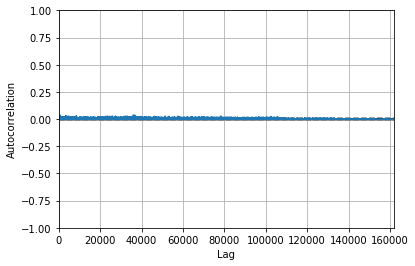

In [61]:
from pandas.plotting import autocorrelation_plot
plt.figure()
#ddata = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))
autocorrelation_plot(data.delaiBalise)

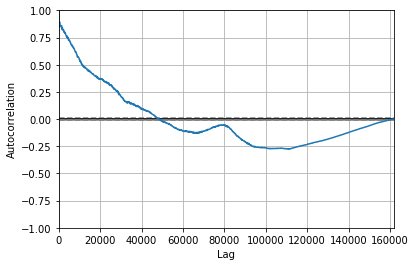

In [62]:
from pandas.plotting import autocorrelation_plot
plt.figure()
#ddata = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))
autocorrelation_plot(data.lat)

/home/user/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:959: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


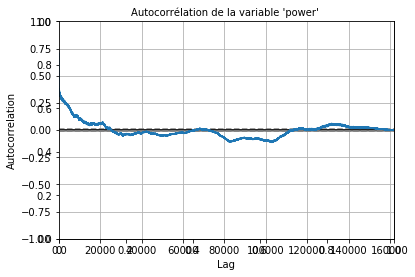

In [63]:
from pandas.plotting import autocorrelation_plot
plt.figure()
plt.title("Autocorrélation de la variable 'power' ", fontsize=10)
#ddata = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))
autocorrelation_plot(data.power)

/home/user/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:959: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


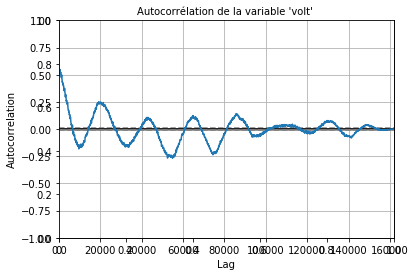

In [76]:
from pandas.plotting import autocorrelation_plot
plt.figure()
plt.title("Autocorrélation de la variable 'volt' ", fontsize=10)
#ddata = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))
autocorrelation_plot(data.volt)

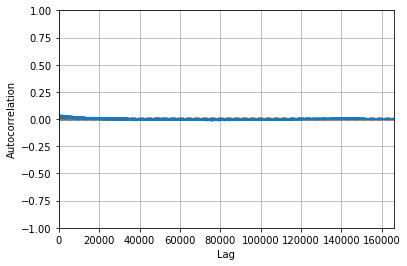

In [104]:
from pandas.plotting import autocorrelation_plot
plt.figure()
#ddata = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))
autocorrelation_plot(data.messageId)

In [64]:
data[['delaiTransmission','delaiBalise','delaiServeur','deltaDistance']].describe()

,delaiTransmission,delaiBalise,delaiServeur,deltaDistance
count,161789.000000,161789.000000,161789.000000,161789.000000
mean,1333.727590,323.709875,324.529857,267.964009
std,13650.271791,5644.235737,5766.628391,198.736905
min,-120.000000,0.000000,-286.000000,0.000000
25%,0.000000,20.000000,20.000000,153.000000
50%,1.000000,20.000000,20.000000,219.000000
75%,1.000000,25.000000,24.000000,378.000000
max,452207.000000,438085.000000,450017.000000,7274.000000


###### Délai de transmission de la balise au serveur

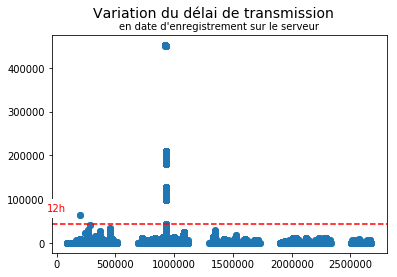

In [66]:
plt.scatter(data.rangDateRec,data.delaiTransmission.values)
#plt.plot([0,250000],[250000,250000], color='red', linestyle='solid')
plt.axhline(y=43200, color='red', linestyle='--')#12h
plt.text(100, 80000, '12h', fontsize=10, color='red', va='center', ha='center', backgroundcolor='w')
plt.suptitle("Variation du délai de transmission",fontsize=14)
plt.title("en date d'enregistrement sur le serveur", fontsize=10)
plt.show()
plt.savefig('../IMG/delaiTransmission.png') 

#data[data["delaiTransmission"]>=250000][['idBalise','delaiBalise',
                                         #'delaiServeur','delaiTransmission',
                                        # 'deltaDistance','vitesse','messageId',
                                       #  'satellites','power']]

Valeurs extrêmes du délai de transmisison :
>On detecte ici des valeurs extrêmes qui traduisent une situation anormale (presque 70h) qui s'est produite en début de période (mois de janvier 2018). Ces 34 observations ne sont pour autant pas équivalentes car le délai de la balise ne se situe pas systématiquement parmi les valeurs extrêmes. Elles concernent toutes la même balise en date du 10 janvier.

#data[(data["delaiTransmission"]<250000) & (data["delaiTransmission"]>50000)&(data["idBalise"]==10004)][['idBalise','delaiBalise','delaiServeur','delaiTransmission','deltaDistance','vitesse','messageId','satellites','power']]

Le phenomène observé ici est le cas d'une balise (la 10004) qui n'a pu emettre les relevés pendant un certain temps (44h) et qui envoi tout l'historique de la trace GPS (892 relevés) en une fois. On observe ce phénomène uniquement sur le délai de transmission. Les délais d'emission et de réception sont eux normaux.

*** Remarque : Le délai de transmission n'est pas la bonne mesure

/home/user/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


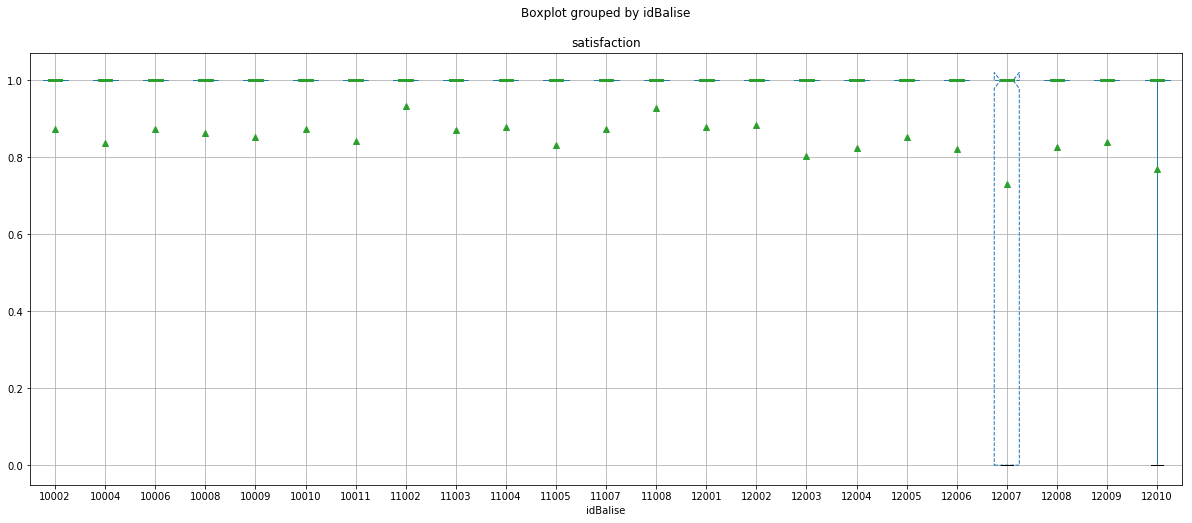

In [67]:
boxprops = dict(linestyle='--', linewidth=1, color='turquoise')
medianprops = dict(linewidth=3, color='red')

data.boxplot(column='satisfaction',by='idBalise', showfliers=False,figsize=(20, 8), 
             showmeans=True, notch=True, whis=[20,80],boxprops=boxprops,medianprops=medianprops)
#plt.axhline(y=268, color='red')
#plt.axhline(y=219, color='blue')

/home/user/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


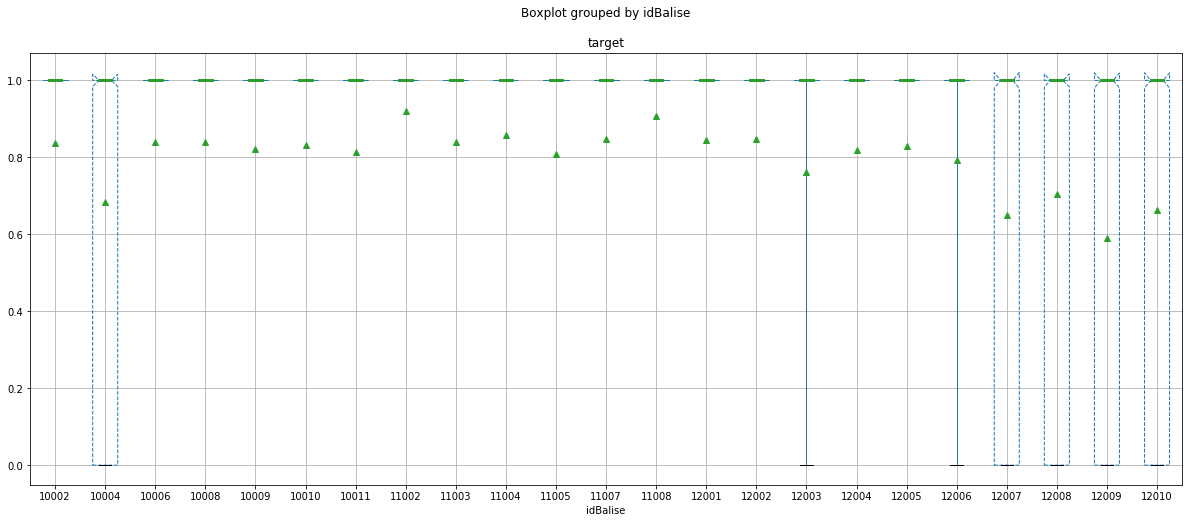

In [68]:
boxprops = dict(linestyle='--', linewidth=1, color='turquoise')
medianprops = dict(linewidth=3, color='red')

data.boxplot(column='target',by='idBalise', showfliers=False,figsize=(20, 8), 
             showmeans=True, notch=True, whis=[20,80],boxprops=boxprops,medianprops=medianprops)
#plt.axhline(y=268, color='red')
#plt.axhline(y=219, color='blue')

Les variations de deltaDistance restent comparable entre les balises bien qu'il y est des valeurs extrêmes assez disparates d'une balise à l'autre.

In [69]:
data.deltaDistance.describe()

count    161789.000000
mean        267.964009
std         198.736905
min           0.000000
25%         153.000000
50%         219.000000
75%         378.000000
max        7274.000000
Name: deltaDistance, dtype: float64

In [70]:
#data[(data["satellites"]==0) ][['lng','lat',
                                       #  'delaiServeur','delaiTransmission',
                                     #    'deltaDistance','vitesse','delaiBalise',
                                    #     'satellites','power']].describe()

In [71]:
data.satellites.describe()

count    161789.000000
mean          8.056432
std           2.067119
min           0.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          12.000000
Name: satellites, dtype: float64

Le nombre de satellites permet de fiabiliser la position GPS. Ici, on constate que les positions GPS sont cohérentes malgrès l'absence de satellites signalés lors des relevés par les balises. A ce stade aucun motif valables pour l'exclure. La distribution est parfaitement symétrique.

###### Délai d'émission de la balise

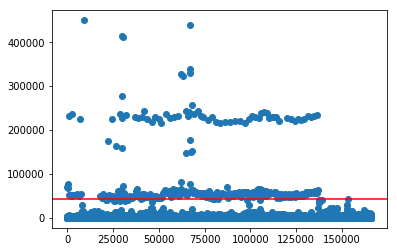

In [74]:
plt.scatter(data.delaiServeur.index,data.delaiServeur.values)
plt.axhline(y=43200, color='red')
plt.show()
plt.savefig('../IMG/delaiServeur.png')

In [3]:
plt.scatter(data.delaiBalise.index,data.delaiBalise.values)
plt.axhline(y=3600, color='black', linestyle='--')#1h
plt.text(180000, 1000, '1h', fontsize=10, va='center', ha='center', backgroundcolor='w')
plt.axhline(y=27000, color='green')#7h30 
plt.text(180000, 40000, '7h30', fontsize=10, color='green', va='center', ha='center', backgroundcolor='w')
plt.axhline(y=43200, color='red')#12h délai délai qui sépare 2 journées de travail consécutives 
plt.text(180000, 80000, '12h', fontsize=10, color='red', va='center', ha='center', backgroundcolor='w')
plt.savefig('../IMG/delaiBalise.png')
plt.show()

NameError: name 'plt' is not defined

In [76]:
data['delaiBalise'].mean()

323.7098752078324

Pour la visualisation, on applique modifie toutes les valeurs extremes au delà de 3600 secondes à 3600 secondes.

In [77]:
#data[data["delaiBalise"]>43199]=323
data["delaiBalise2"] =data.apply ( lambda row : 3600 if row["delaiBalise"]>3600 else row["delaiBalise"], axis = 1 )


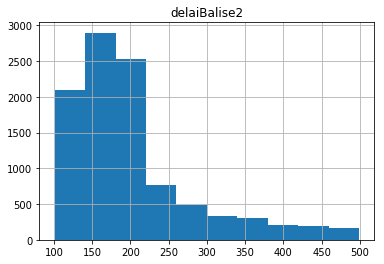

In [79]:
data[(data['delaiBalise2']<500)&(data['delaiBalise2']>100)].hist(column='delaiBalise2')
plt.savefig('../IMG/HistodelaiBalise2.png')

In [80]:
data.delaiBalise2.mean()

108.04423044829994

In [81]:
data.delaiBalise2.quantile(.80)

34.0

In [82]:
data_plus_30_sec=data[data['delaiBalise2']>34]

ratio=100*data_plus_30_sec.delaiBalise2.count()/data.delaiBalise2.count()

print ("%.0f pourcent hors délai (supérieur à 34 secondes) pour emettre une nouvelle position " % ratio)

20 pourcent hors délai (supérieur à 34 secondes) pour emettre une nouvelle position 


> # **Conclusion analyse univariée ** : 
- Le délai de transmission ne donne pas la bonne mesure donc cette variable sera supprimée.
- des différences d'unités de mesure et d'échelles
- les distributions ne suivent pas de loi normale

# Distribution variable centrées réduites

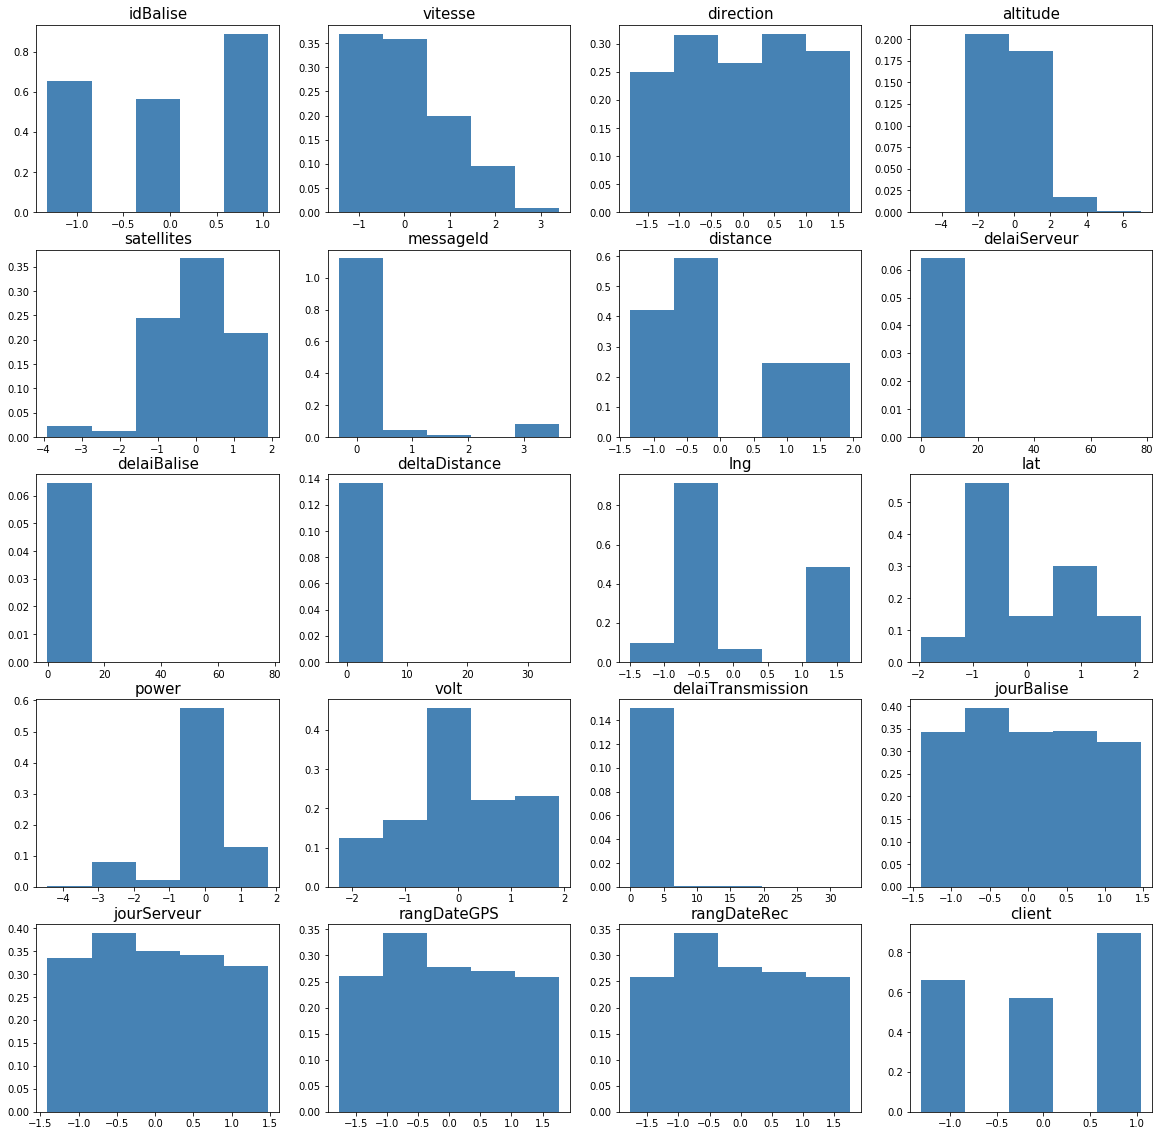

In [83]:
#standardisation des données train et test
from sklearn import preprocessing
#standardisation des données initiales
data_model_q=data[['idBalise', 'vitesse', 'direction', 'altitude', 'satellites',
       'messageId', 'distance', 'delaiServeur', 'delaiBalise', 'deltaDistance',
       'lng', 'lat', 'power', 'volt', 
       'delaiTransmission', 'jourBalise', 'jourServeur', 'rangDateGPS',
       'rangDateRec', 'client']]
std_scale_data = preprocessing.StandardScaler().fit(data_model_q)
data_model_std = std_scale_data.transform(data_model_q)


#visualisation des variables avec même ordre de grandeur
fig = plt.figure(figsize=(20, 20))
for feat_idx in range(data_model_std.shape[1]):
    ax = fig.add_subplot(5,4, (feat_idx+1))
    h = ax.hist(data_model_std[:, feat_idx], bins=5, color='steelblue',
    normed=True, edgecolor='none')
    ax.set_title(data_model_q.columns[feat_idx], fontsize=15)

In [85]:
df_kurt = data_model_q.kurt()
df_skew = data_model_q.skew()
df_kurt

dfk1 = pd.concat([df_kurt, df_skew], axis=1, join='outer', ignore_index=False)
dfk1.columns = ['Kurtosis', 'Skewness']
dfk1

,Kurtosis,Skewness
idBalise,-1.578229,-0.212924
vitesse,-0.560430,0.489098
direction,-1.223374,-0.037547
altitude,4.160125,1.761563
satellites,4.186513,-1.536152
messageId,8.212739,3.105209
distance,-1.102712,0.722170
delaiServeur,2002.995305,40.663695
delaiBalise,1910.723105,39.882667
deltaDistance,71.344104,4.143309


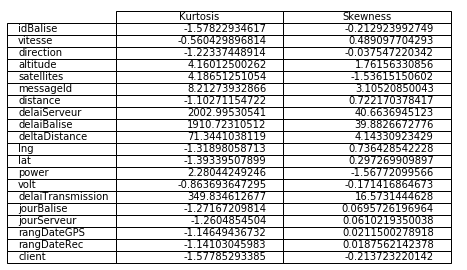

In [86]:

from pandas.plotting import table
#desc = df['Revenue'].describe()
ax.set_title('Simple plot')
#create a subplot without frame
plot = plt.subplot(919, frame_on=False)

#remove axis
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False) 

#create the table plot and position it in the upper left corner
table(plot, dfk1,loc='upper right')

#save the plot as a png file
#plt.savefig('desc_plot.png')

/home/user/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


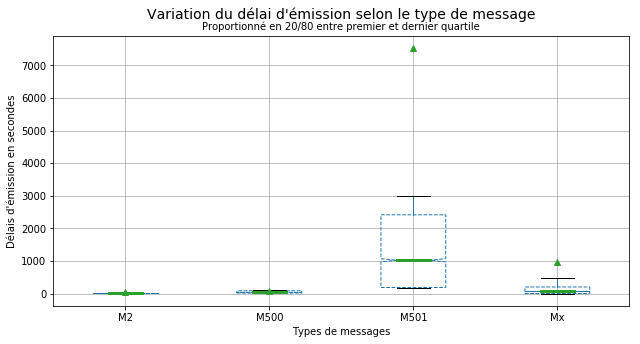

In [87]:
boxprops = dict(linestyle='--', linewidth=1, color='turquoise')
medianprops = dict(linewidth=3, color='red')

data.boxplot(column='delaiBalise',by='labelMessage', showfliers=False,figsize=(10, 5), 
             showmeans=True, notch=True, whis=[20,80],boxprops=boxprops,medianprops=medianprops)
plt.suptitle("Variation du délai d'émission selon le type de message",fontsize=14)
plt.title("Proportionné en 20/80 entre premier et dernier quartile", fontsize=10)
#Variation du délai d'émission selon le type de message

plt.xlabel("Types de messages")
plt.ylabel("Délais d'émission en secondes")

plt.show()


/home/user/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


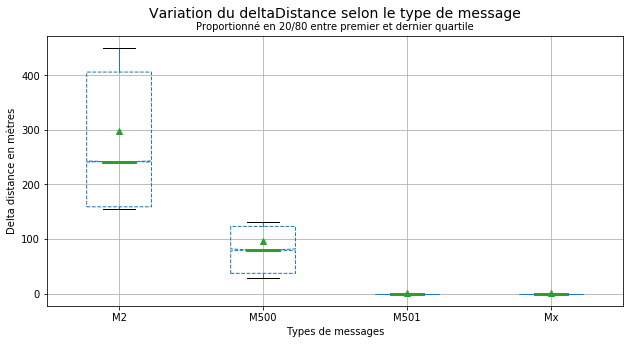

In [88]:
boxprops = dict(linestyle='--', linewidth=1, color='turquoise')
medianprops = dict(linewidth=3, color='red')

data.boxplot(column='deltaDistance',by='labelMessage', showfliers=False,figsize=(10, 5), 
             showmeans=True, notch=True, whis=[20,80],boxprops=boxprops,medianprops=medianprops)
plt.suptitle("Variation du deltaDistance selon le type de message",fontsize=14)
plt.title("Proportionné en 20/80 entre premier et dernier quartile", fontsize=10)
#Variation du délai d'émission selon le type de message

plt.xlabel("Types de messages")
plt.ylabel("Delta distance en mètres")

plt.show()


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161789 entries, 0 to 165968
Data columns (total 30 columns):
dateHeureRec            161789 non-null datetime64[ns]
dateHeureGPS            161789 non-null datetime64[ns]
idBalise                161789 non-null int64
vitesse                 161789 non-null int64
direction               161789 non-null int64
altitude                161789 non-null int64
satellites              161789 non-null int64
messageId               161789 non-null int64
distance                161789 non-null int64
dateHeureServeurSuiv    161789 non-null datetime64[ns]
dateHeureBaliseSuiv     161789 non-null datetime64[ns]
distanceSuiv            161789 non-null int64
delaiServeur            161789 non-null int64
delaiBalise             161789 non-null int64
deltaDistance           161789 non-null int64
lng                     161789 non-null float64
lat                     161789 non-null float64
power                   161789 non-null float64
volt               

/home/user/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


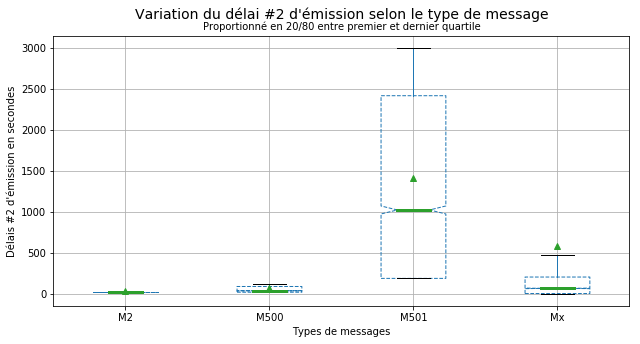

In [89]:
boxprops = dict(linestyle='--', linewidth=1, color='turquoise')
medianprops = dict(linewidth=3, color='red')

data.boxplot(column='delaiBalise2',by='labelMessage', showfliers=False,figsize=(10, 5), 
             showmeans=True, notch=True, whis=[20,80],boxprops=boxprops,medianprops=medianprops)
plt.suptitle("Variation du délai #2 d'émission selon le type de message",fontsize=14)
plt.title("Proportionné en 20/80 entre premier et dernier quartile", fontsize=10)
#Variation du délai d'émission selon le type de message

plt.xlabel("Types de messages")
plt.ylabel("Délais #2 d'émission en secondes")


plt.show()


In [90]:
data['etat'].value_counts()

roule    150784
stop      11005
Name: etat, dtype: int64

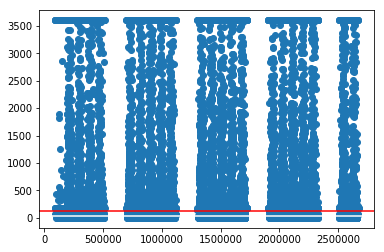

In [92]:
df_group=data[(data['deltaDistance']==0) & (data['vitesse']==0) ].groupby(['idBalise'])['vitesse'].count()
df_group

#Pas de phénomène temporel : phenomène constant dans le temps 20 /80 - 80 % se concentre sous la barre des 34 secondes 20% au-dessus.
plt.scatter(data.rangDateGPS,data.delaiBalise2)
plt.axhline(y=129, color='red')
plt.axhline(y=34, color='white')
plt.show()

> ### Matrice de nuage de points

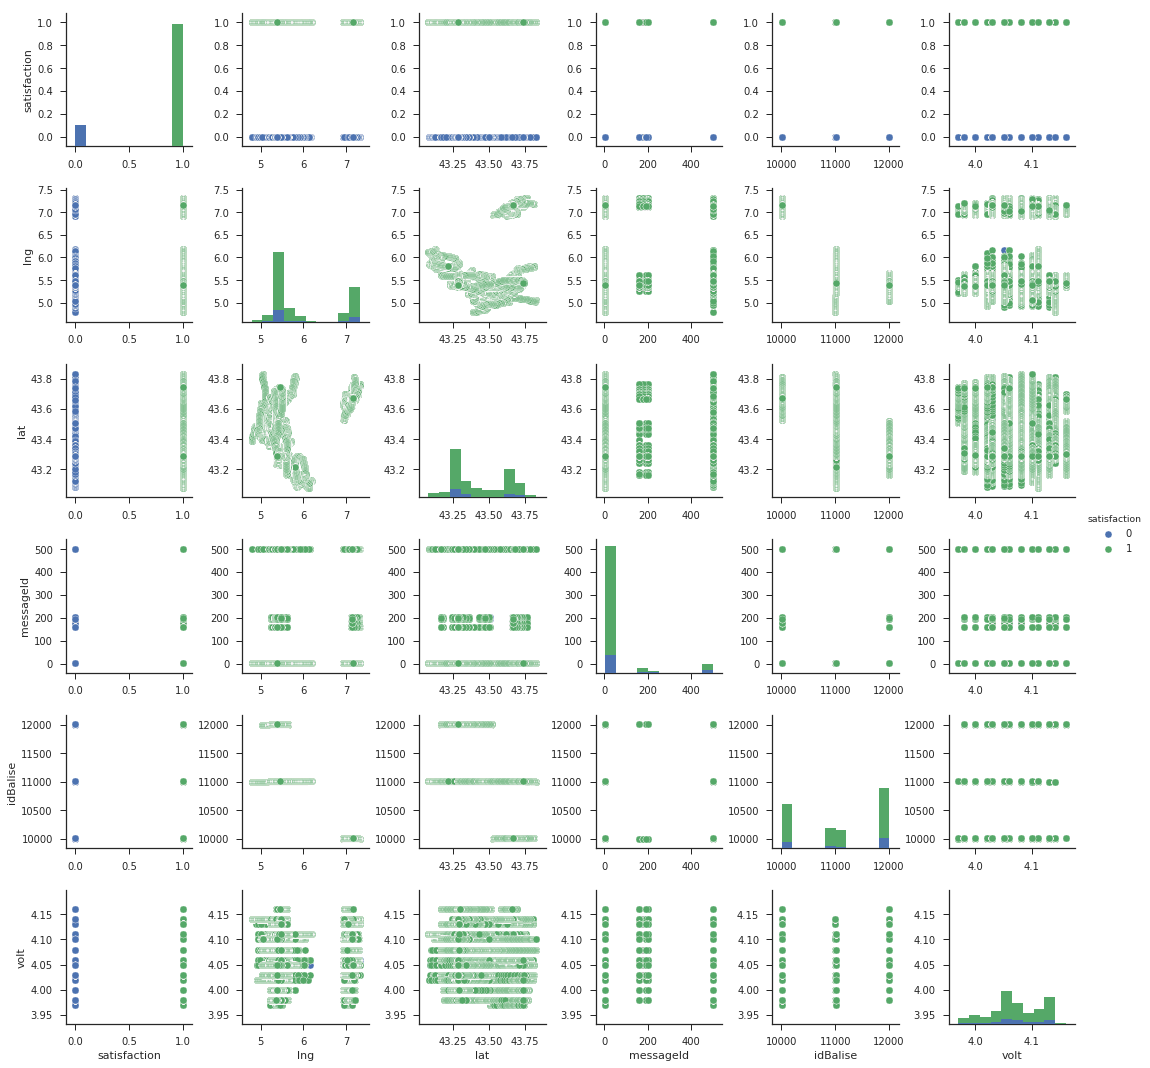

In [93]:
sns.set(style="ticks")
df_pair=data[['satisfaction','lng','lat','messageId','idBalise','volt']]

sns.pairplot(df_pair, hue="satisfaction")

In [96]:
df_group_freq_OKKO=data.groupby(['zone','OKKO']).satisfaction.count()
df_group_freq_OKKO.to_csv('../DATA/PREPADATA/df_grouped_freq_OKKO.csv', sep = ';',index = True)
#data[data["satisfaction"]==0].satisfaction.count() * 100 / len(data)
#data[data["satisfaction"]==0].counts * 100 / len(data)

In [97]:
d=np.array(df_group_freq_OKKO.index.labels[1])

In [98]:
#df_group_freq_OKKO.unstack(fill_value=0)

In [99]:
df=data[['delaiBalise','lng','lat','direction','idBalise','messageId','deltaDistance','vitesse','altitude','satellites','power','volt']]

In [100]:
df_corr_pearson = data_model_q.corr()#par defaut pearson
#df_corr_pearson

5713 2


Text(0.5,0.98,'Nombre observation par zone et par balise')

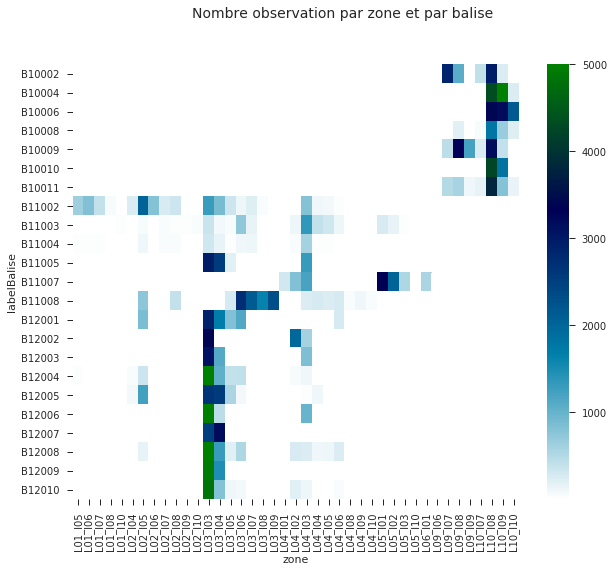

In [101]:
s=data.groupby(['labelBalise', 'zone'])['labelBalise'].count()
s.values
print(s.max(), s.min())
plt.rcParams["figure.figsize"] = [10,8]
data_set=s.unstack(fill_value=0)
sns.heatmap(data_set,vmin=2,vmax=5000,cmap="ocean_r")
plt.suptitle('Nombre observation par zone et par balise', fontsize=14)

Text(0.5,0.98,'Nombre observation par individus et par etat')

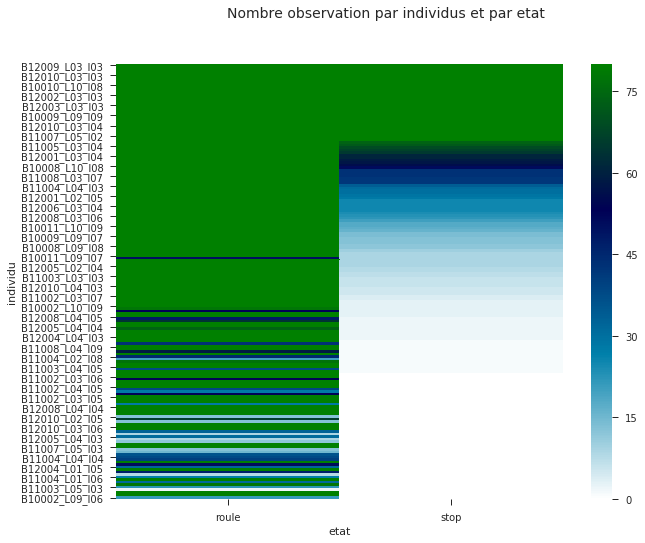

In [102]:
#s=data[data['idBalise'].isin([12007,12010,12008,12004])].groupby(['individu', 'etat'])['etat'].count()
s=data.groupby(['individu', 'etat'])['etat'].count()
#print(s)
plt.rcParams["figure.figsize"] = [10,8]
data_set=s.unstack(fill_value=0).sort_values(by='stop', ascending=False)
#print(data_set)
sns.heatmap(data_set,vmin=0,vmax=80,cmap="ocean_r")
plt.suptitle('Nombre observation par individus et par etat', fontsize=14)

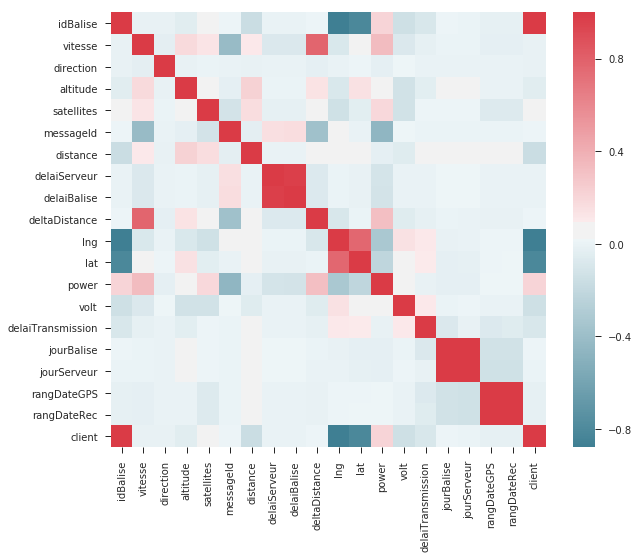

In [103]:
f, ax = plt.subplots(figsize=(10, 8))
#corr = dataframe.corr()
sns.heatmap(df_corr_pearson, mask=np.zeros_like(df_corr_pearson, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [104]:
df_corr_kendall = data_model_q.corr(method='kendall')

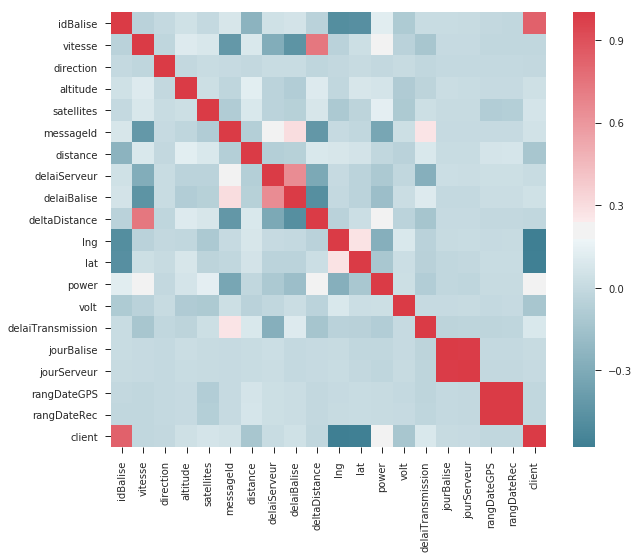

In [105]:
f, ax = plt.subplots(figsize=(10, 8))
#corr = dataframe.corr()
sns.heatmap(df_corr_kendall, mask=np.zeros_like(df_corr_kendall, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [106]:
df_corr_spearman = data_model_q.corr(method='spearman')

f, ax = plt.subplots(figsize=(10, 8))
#corr = dataframe.corr()
sns.heatmap(df_corr_spearman, mask=np.zeros_like(df_corr_spearman, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [108]:
df1=data[data['satisfaction']==1][['delaiBalise','lng','lat','direction','idBalise','messageId','deltaDistance','vitesse','altitude','satellites','power','volt']]

In [109]:
df0=data[data['satisfaction']==0][['delaiBalise','lng','lat','direction','idBalise','messageId','deltaDistance','vitesse','altitude','satellites','power','volt']]

In [110]:
df_corr_spearman = df.corr(method='spearman')

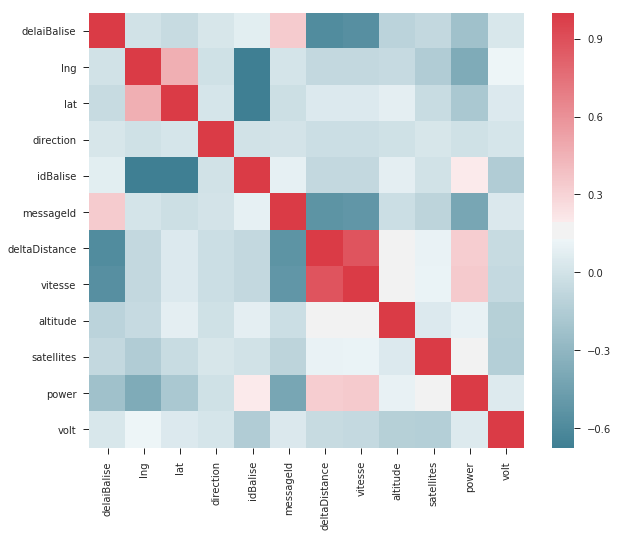

In [113]:
f, ax = plt.subplots(figsize=(10, 8))
#corr = dataframe.corr()
sns.heatmap(df_corr_spearman, mask=np.zeros_like(df_corr_spearman0, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [114]:
df_cov=df.cov()
df_cov

,delaiBalise,lng,lat,direction,idBalise,messageId,deltaDistance,vitesse,altitude,satellites,power,volt
delaiBalise,3.185740e+07,8.979073,-6.098203,-2742.761949,1785.260518,116948.129726,-78547.088705,-13447.847857,1299.608774,-161.913252,-411.687212,0.113235
lng,8.979073e+00,0.626257,0.112633,-0.092208,-589.485052,2.655292,-14.086762,-2.101902,-5.273260,-0.217371,-0.163288,0.005261
lat,-6.098203e+00,0.112633,0.033949,0.241617,-125.941979,-0.050205,0.325210,0.210702,2.239509,-0.015410,-0.024509,0.000251
direction,-2.742762e+03,-0.092208,0.241617,10684.967292,-657.905161,-43.793797,-530.726868,-102.323463,-89.330157,1.338245,-1.415637,0.082189
idBalise,1.785261e+03,-589.485052,-125.941979,-657.905161,718749.769340,1482.354270,2248.469723,-187.041897,-3118.512533,79.114537,113.954801,-5.344064
messageId,1.169481e+05,2.655292,-0.050205,-43.793797,1482.354270,15876.865923,-9388.419751,-1693.913743,-257.361155,-30.343209,-36.394204,0.097128
deltaDistance,-7.854709e+04,-14.086762,0.325210,-530.726868,2248.469723,-9388.419751,39496.357254,4899.554582,2297.527855,29.460866,39.707796,-0.514301
vitesse,-1.344785e+04,-2.101902,0.210702,-102.323463,-187.041897,-1693.913743,4899.554582,1008.204021,472.624530,8.608366,6.635355,-0.111243
altitude,1.299609e+03,-5.273260,2.239509,-89.330157,-3118.512533,-257.361155,2297.527855,472.624530,6803.123276,5.154895,4.356512,-0.483928
satellites,-1.619133e+02,-0.217371,-0.015410,1.338245,79.114537,-30.343209,29.460866,8.608366,5.154895,4.272979,0.244971,-0.011902


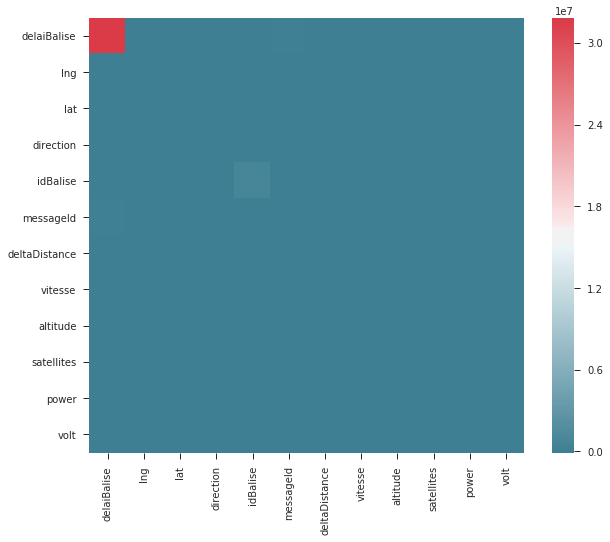

In [115]:
f, ax = plt.subplots(figsize=(10, 8))
#corr = dataframe.corr()
sns.heatmap(df_cov, mask=np.zeros_like(df_cov, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Les délais les plus importants semblent être localisés en certains point (longitutude,latitude) différents selon le client.

# Sauvegarde fichier pour Modelisation

In [206]:
data_model_q.to_csv('../DATA/PREPADATA/data_model_q.csv', sep = ';',index = False)
